In [1]:
import pandas as pd
import numpy as np
import fbprophet as ph
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
dataset = pd.read_csv("RefBldgHospitalNew.csv") # 2004
print(dataset.shape)
print(dataset.columns)
dataset.head()

(8760, 11)
Index(['Date/Time', 'Electricity:Facility [kW](Hourly)',
       'Fans:Electricity [kW](Hourly)', 'Cooling:Electricity [kW](Hourly)',
       'Heating:Electricity [kW](Hourly)',
       'InteriorLights:Electricity [kW](Hourly)',
       'InteriorEquipment:Electricity [kW](Hourly)',
       'Gas:Facility [kW](Hourly)', 'Heating:Gas [kW](Hourly)',
       'InteriorEquipment:Gas [kW](Hourly)',
       'Water Heater:WaterSystems:Gas [kW](Hourly)'],
      dtype='object')


,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
0,01/01 01:00:00,780.505925,102.203354,391.580763,0.0,34.961655,113.31278,643.239183,628.856149,5.66467,8.718364
1,01/01 02:00:00,778.138589,102.203354,400.770817,0.0,34.961655,113.31278,655.744648,632.663475,5.66467,17.416503
2,01/01 03:00:00,787.421514,102.203354,403.860968,0.0,34.961655,113.31278,662.874018,639.794366,5.66467,17.414982
3,01/01 04:00:00,797.705194,102.203354,402.927995,0.0,34.961655,113.31278,660.449268,646.065868,5.66467,8.718730
4,01/01 05:00:00,807.032061,102.203354,400.204188,0.0,44.493766,113.31278,665.570284,642.488544,5.66467,17.417071


In [3]:
dataset.tail()

,Date/Time,Electricity:Facility [kW](Hourly),Fans:Electricity [kW](Hourly),Cooling:Electricity [kW](Hourly),Heating:Electricity [kW](Hourly),InteriorLights:Electricity [kW](Hourly),InteriorEquipment:Electricity [kW](Hourly),Gas:Facility [kW](Hourly),Heating:Gas [kW](Hourly),InteriorEquipment:Gas [kW](Hourly),Water Heater:WaterSystems:Gas [kW](Hourly)
8755,12/31 20:00:00,839.860122,102.203354,414.748257,0.0,44.493766,155.957040,571.600791,497.539086,56.646700,17.415005
8756,12/31 21:00:00,806.442742,102.203354,409.423754,0.0,44.493766,124.558693,602.008942,536.643496,56.646700,8.718746
8757,12/31 22:00:00,796.220841,102.203354,409.852635,0.0,44.493766,124.558693,604.129298,544.227192,42.485025,17.417081
8758,12/31 23:00:00,797.559528,102.203354,409.313899,0.0,34.961655,124.558693,614.845607,569.106824,28.323350,17.415433
8759,12/31 24:00:00,805.943727,102.203354,399.333715,0.0,34.961655,124.558693,606.437217,583.556565,14.161675,8.718977


In [4]:
df_electric = dataset[['Date/Time', 'Electricity:Facility [kW](Hourly)']]
df_gas = dataset[['Date/Time',  'Gas:Facility [kW](Hourly)']]
df_electric.head()

,Date/Time,Electricity:Facility [kW](Hourly)
0,01/01 01:00:00,780.505925
1,01/01 02:00:00,778.138589
2,01/01 03:00:00,787.421514
3,01/01 04:00:00,797.705194
4,01/01 05:00:00,807.032061


In [5]:
df_gas.head()

,Date/Time,Gas:Facility [kW](Hourly)
0,01/01 01:00:00,643.239183
1,01/01 02:00:00,655.744648
2,01/01 03:00:00,662.874018
3,01/01 04:00:00,660.449268
4,01/01 05:00:00,665.570284


In [6]:
df_electric.rename(columns={'Date/Time': 'ds', 'Electricity:Facility [kW](Hourly)': 'y'}, inplace=True)
df_gas.rename(columns={'Date/Time': 'ds', 'Gas:Facility [kW](Hourly)': 'y'}, inplace=True)
df_electric

,ds,y
0,01/01 01:00:00,780.505925
1,01/01 02:00:00,778.138589
2,01/01 03:00:00,787.421514
3,01/01 04:00:00,797.705194
4,01/01 05:00:00,807.032061
...,...,...
8755,12/31 20:00:00,839.860122
8756,12/31 21:00:00,806.442742
8757,12/31 22:00:00,796.220841
8758,12/31 23:00:00,797.559528


In [7]:
df_electric['year'] = 2004
df_electric['month'] = df_electric['ds'].apply(lambda x: x[:3])
df_electric['day'] = df_electric['ds'].apply(lambda x: x[4:6])
df_electric['hour'] = df_electric['ds'].apply(lambda x: x[8:10])
df_electric.head(24)

,ds,y,year,month,day,hour
0,01/01 01:00:00,780.505925,2004,01,01,01
1,01/01 02:00:00,778.138589,2004,01,01,02
2,01/01 03:00:00,787.421514,2004,01,01,03
3,01/01 04:00:00,797.705194,2004,01,01,04
4,01/01 05:00:00,807.032061,2004,01,01,05
5,01/01 06:00:00,804.705359,2004,01,01,06
6,01/01 07:00:00,876.785387,2004,01,01,07
7,01/01 08:00:00,867.385046,2004,01,01,08
8,01/01 09:00:00,938.214726,2004,01,01,09
9,01/01 10:00:00,937.176337,2004,01,01,10


In [8]:
df_gas['year'] = 2004
df_gas['month'] = df_gas['ds'].apply(lambda x: x[:3])
df_gas['day'] = df_gas['ds'].apply(lambda x: x[4:6])
df_gas['hour'] = df_gas['ds'].apply(lambda x: x[8:10])
df_gas.head(24)

,ds,y,year,month,day,hour
0,01/01 01:00:00,643.239183,2004,01,01,01
1,01/01 02:00:00,655.744648,2004,01,01,02
2,01/01 03:00:00,662.874018,2004,01,01,03
3,01/01 04:00:00,660.449268,2004,01,01,04
4,01/01 05:00:00,665.570284,2004,01,01,05
5,01/01 06:00:00,678.474976,2004,01,01,06
6,01/01 07:00:00,623.591410,2004,01,01,07
7,01/01 08:00:00,627.036374,2004,01,01,08
8,01/01 09:00:00,573.040120,2004,01,01,09
9,01/01 10:00:00,522.336516,2004,01,01,10


In [9]:
df_electric['ds'] = pd.to_datetime(df_electric[['year', 'month', 'day', 'hour']])
df_electric.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
df_electric

,ds,y
0,2004-01-01 01:00:00,780.505925
1,2004-01-01 02:00:00,778.138589
2,2004-01-01 03:00:00,787.421514
3,2004-01-01 04:00:00,797.705194
4,2004-01-01 05:00:00,807.032061
...,...,...
8755,2004-12-31 20:00:00,839.860122
8756,2004-12-31 21:00:00,806.442742
8757,2004-12-31 22:00:00,796.220841
8758,2004-12-31 23:00:00,797.559528


In [10]:
df_gas['ds'] = pd.to_datetime(df_gas[['year', 'month', 'day', 'hour']])
df_gas.drop(columns=['year', 'month', 'day', 'hour'], inplace=True)
df_gas

,ds,y
0,2004-01-01 01:00:00,643.239183
1,2004-01-01 02:00:00,655.744648
2,2004-01-01 03:00:00,662.874018
3,2004-01-01 04:00:00,660.449268
4,2004-01-01 05:00:00,665.570284
...,...,...
8755,2004-12-31 20:00:00,571.600791
8756,2004-12-31 21:00:00,602.008942
8757,2004-12-31 22:00:00,604.129298
8758,2004-12-31 23:00:00,614.845607


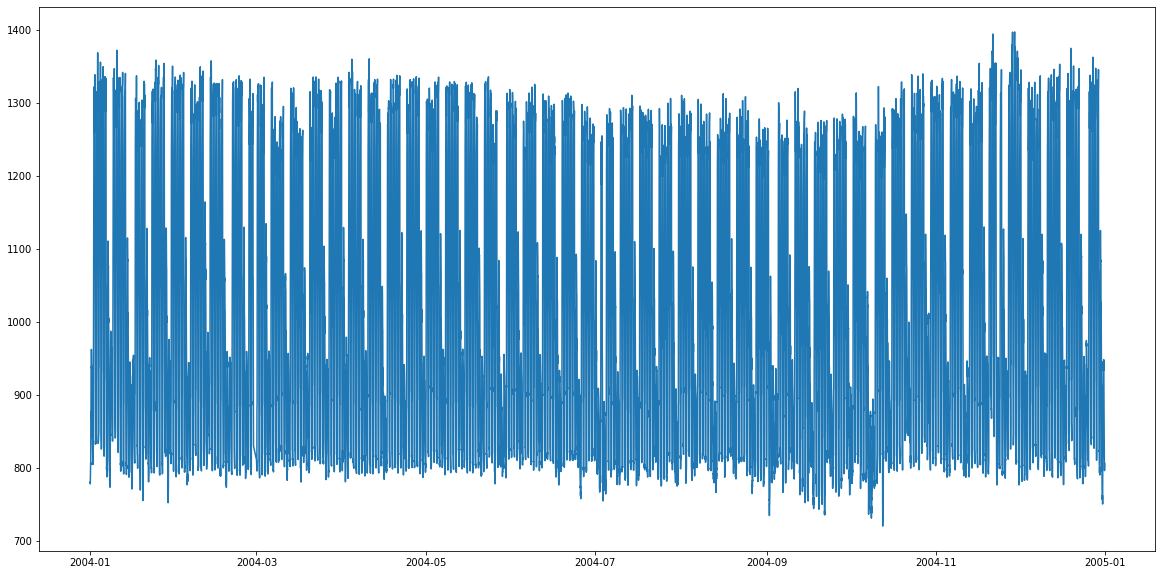

In [11]:
plt.figure(figsize=(20,10))
plt.plot(df_electric['ds'], df_electric['y'])

# Log Scale 

In [12]:
df_gas['y'] = np.log(df_gas['y'])
df_electric['y'] = np.log(df_electric['y'])

# Selecting 11 months of data only to build the model and then testing how model predict for the remaining 12 month

In [13]:
df11_gas = df_gas[df_gas['ds'] < datetime.datetime(2004,12,1,0,0,0)]
df11_electric = df_electric[df_electric['ds'] < datetime.datetime(2004,12,1,0,0,0)]

# 12th month data

In [14]:
df12_gas = df_gas[df_gas['ds'] >= datetime.datetime(2004,12,1,0,0,0)]
df12_electric = df_electric[df_electric['ds'] >= datetime.datetime(2004,12,1,0,0,0)]

# Training

In [15]:
m_gas = ph.Prophet()
m_gas.fit(df11_gas)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [16]:
m_electric = ph.Prophet()
m_electric.fit(df11_electric)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [17]:
m_gas.history

,ds,y,floor,t,y_scaled
0,2004-01-01 01:00:00,6.466517,0,0.000000,0.914685
1,2004-01-01 02:00:00,6.485771,0,0.000124,0.917409
2,2004-01-01 03:00:00,6.496585,0,0.000249,0.918938
3,2004-01-01 04:00:00,6.492920,0,0.000373,0.918420
4,2004-01-01 05:00:00,6.500644,0,0.000498,0.919513
...,...,...,...,...,...
8010,2004-11-30 19:00:00,6.280480,0,0.999502,0.888371
8011,2004-11-30 20:00:00,6.251667,0,0.999627,0.884295
8012,2004-11-30 21:00:00,6.331139,0,0.999751,0.895536
8013,2004-11-30 22:00:00,6.303026,0,0.999876,0.891560


In [18]:
m_electric.history

,ds,y,floor,t,y_scaled
0,2004-01-01 01:00:00,6.659942,0,0.000000,0.919580
1,2004-01-01 02:00:00,6.656905,0,0.000124,0.919160
2,2004-01-01 03:00:00,6.668764,0,0.000249,0.920798
3,2004-01-01 04:00:00,6.681739,0,0.000373,0.922590
4,2004-01-01 05:00:00,6.693363,0,0.000498,0.924195
...,...,...,...,...,...
8010,2004-11-30 19:00:00,6.963178,0,0.999502,0.961450
8011,2004-11-30 20:00:00,6.964241,0,0.999627,0.961596
8012,2004-11-30 21:00:00,6.835858,0,0.999751,0.943870
8013,2004-11-30 22:00:00,6.803974,0,0.999876,0.939467


In [19]:
future_gas = m_gas.make_future_dataframe(freq='H',periods=744) # Next 24x31 = 744 hours or 31 days
forecast_gas= m_gas.predict(future_gas)
forecast_gas[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8754,2004-12-31 19:00:00,6.411380,6.218964,6.616768
8755,2004-12-31 20:00:00,6.453806,6.254842,6.658880
8756,2004-12-31 21:00:00,6.486148,6.287783,6.705194
8757,2004-12-31 22:00:00,6.511345,6.305887,6.728817
8758,2004-12-31 23:00:00,6.523968,6.318637,6.717837


In [20]:
forecast_gas.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'daily', 'daily_lower', 'daily_upper', 'weekly', 'weekly_lower',
       'weekly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

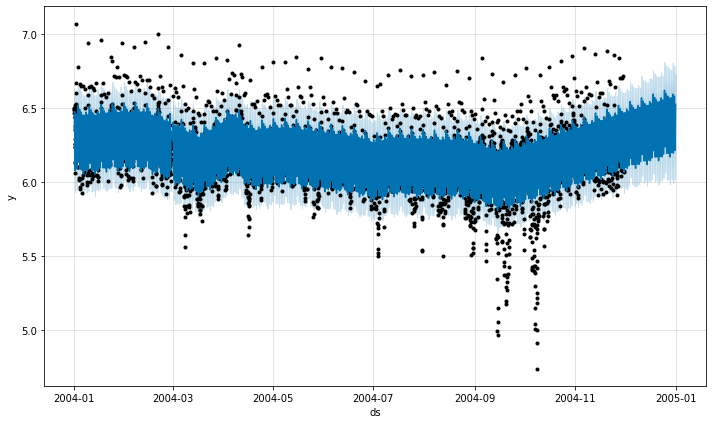

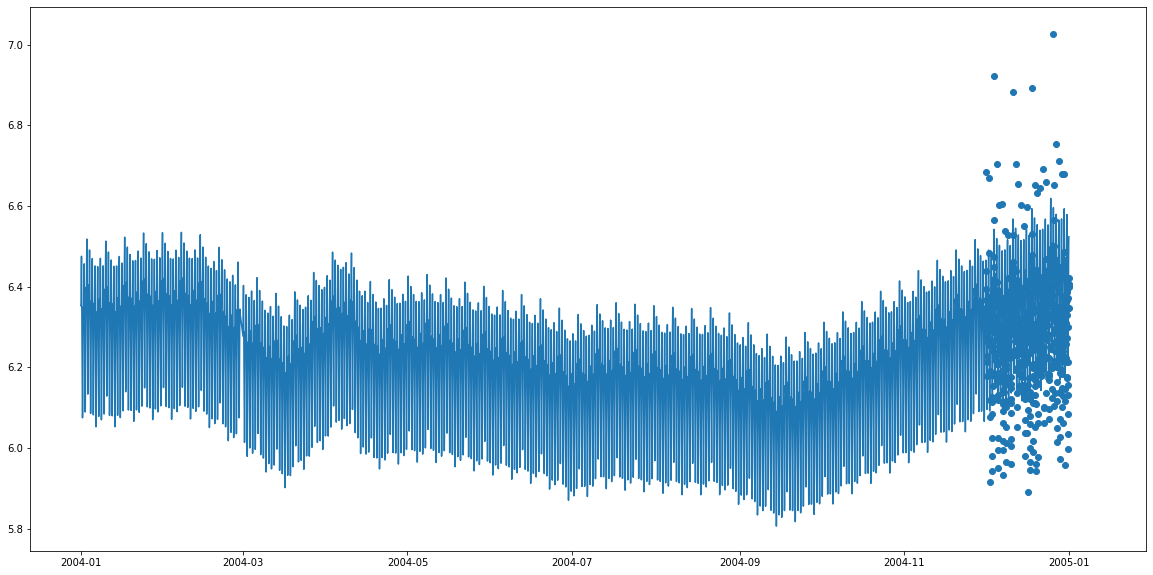

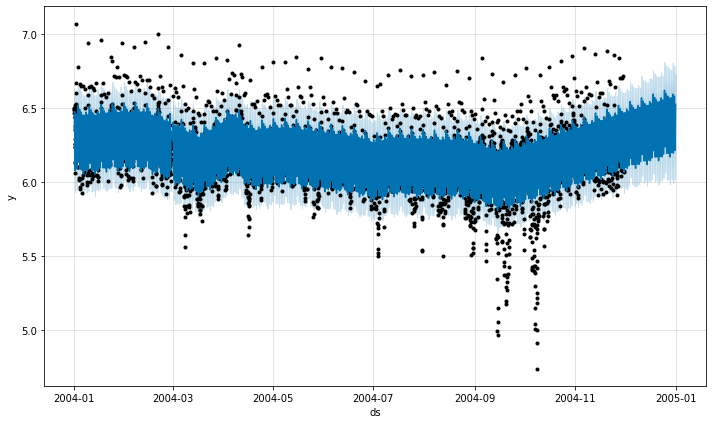

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(df12_gas['ds'],df12_gas['y'])
plt.plot(forecast_gas['ds'],forecast_gas['yhat'])
m_gas.plot(forecast_gas)

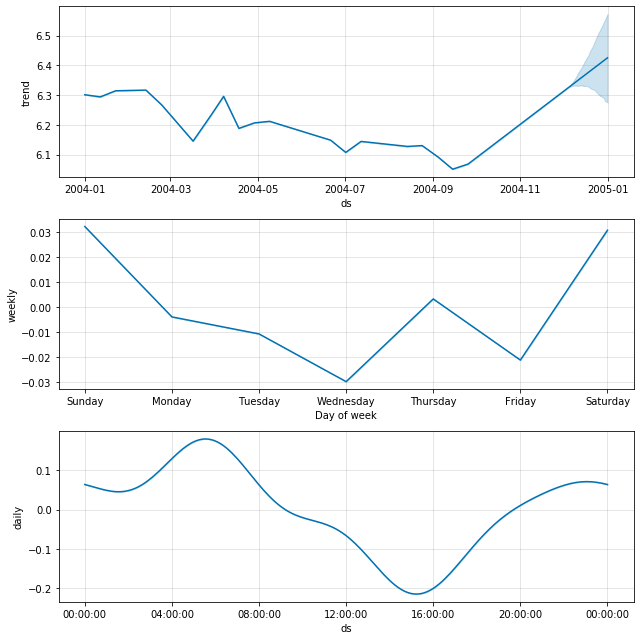

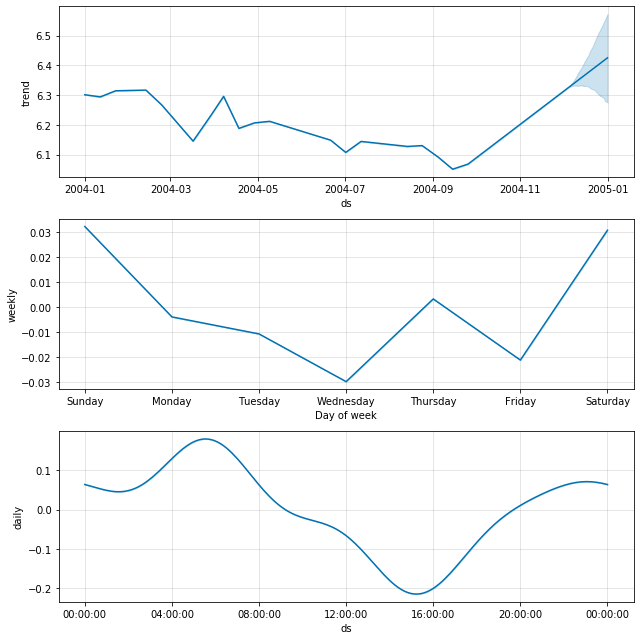

In [22]:
m_gas.plot_components(forecast_gas)

# Automatic changepoint detection in Prophet (Finding better scale

## If the trend changes are being overfit (too much flexibility) or underfit (not enough flexiblity), you can adjust the strength of the sparse prior using the input argument changepoint_prior_scale.

# Setting future for one month

In [23]:
future_gas_ch = m_gas.make_future_dataframe(freq='H', periods=744) # Next 31 days

# Now adjusting trends for the next month (31 days)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


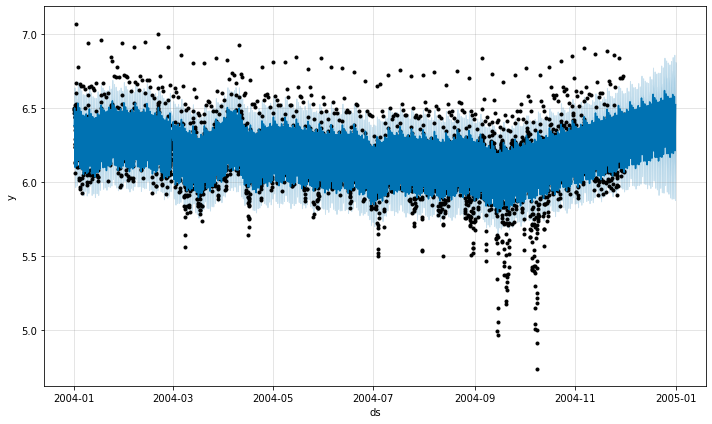

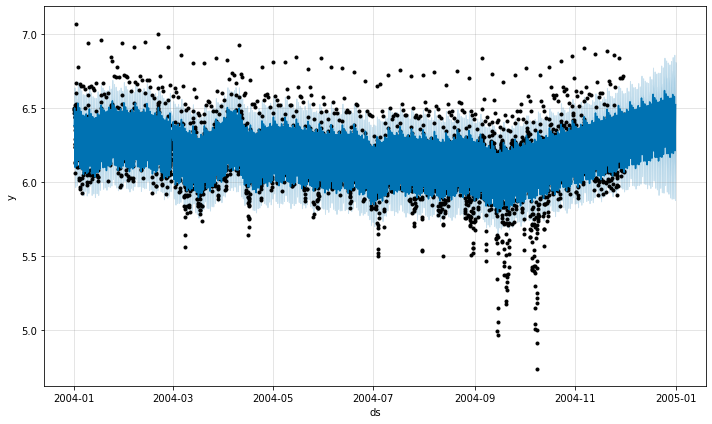

In [24]:
m_gas_ch = ph.Prophet(changepoint_prior_scale=0.5) # default is 0.5
forecast_gas_ch = m_gas_ch.fit(df11_gas).predict(future_gas_ch)
m_gas_ch.plot(forecast_gas_ch)

# Increasing changepoint_prior_scale values will make the trend more flexible:

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


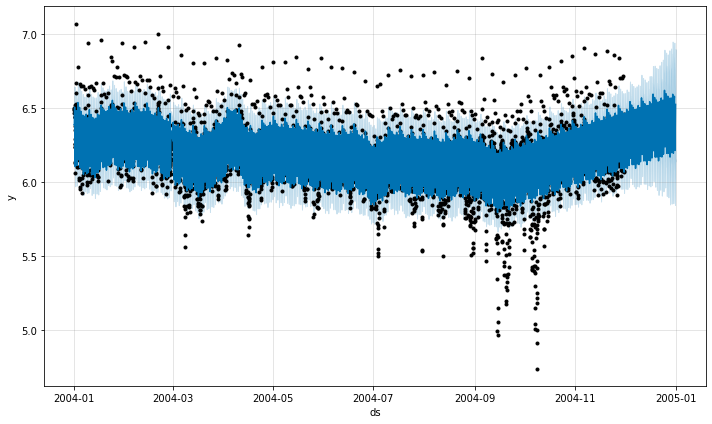

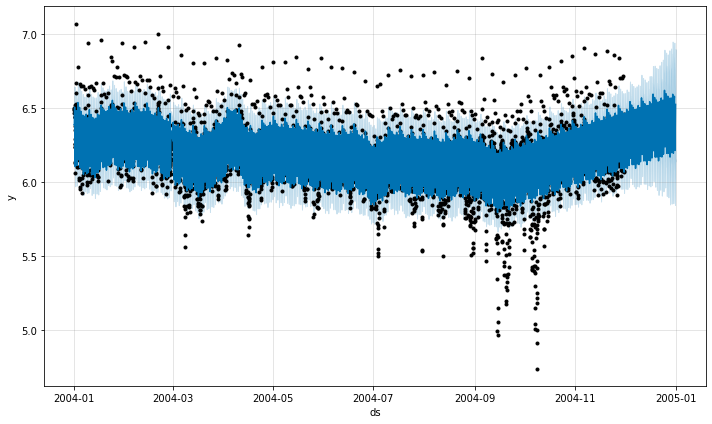

In [25]:
m_gas_ch1 = ph.Prophet(changepoint_prior_scale=1)
forecast_gas_ch1 = m_gas_ch1.fit(df11_gas).predict(future_gas_ch)
m_gas_ch1.plot(forecast_gas_ch1)

# Finding better scale for gas utilization

# Decreasing changepoint_prior_scale values will make the trend less flexible:

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


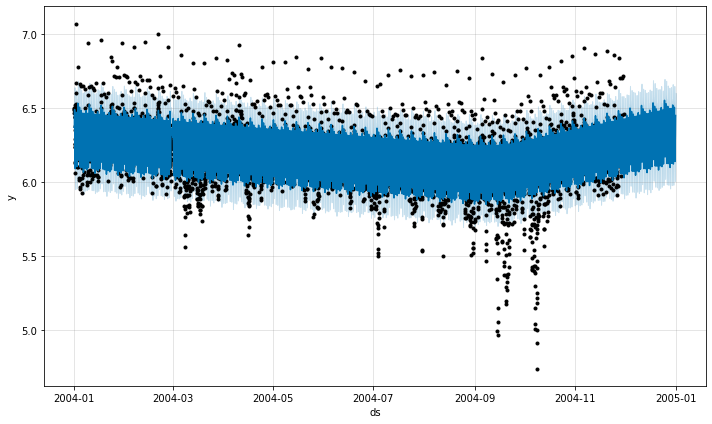

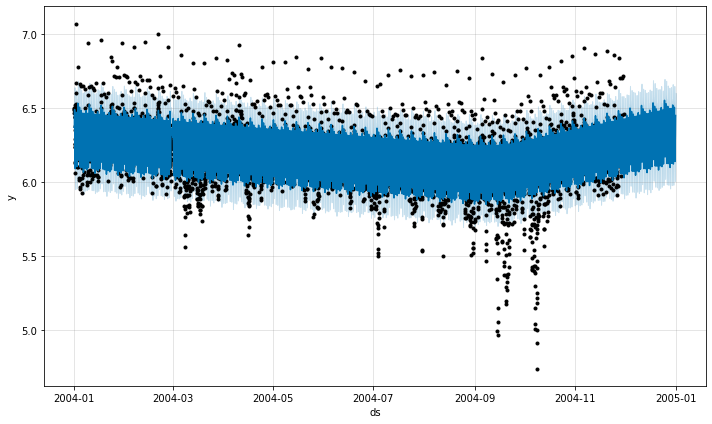

In [26]:
m_gas_ch001 = ph.Prophet(changepoint_prior_scale=0.001)
forecast_gas_ch001 = m_gas_ch001.fit(df11_gas).predict(future_gas_ch)
m_gas_ch001.plot(forecast_gas_ch001)

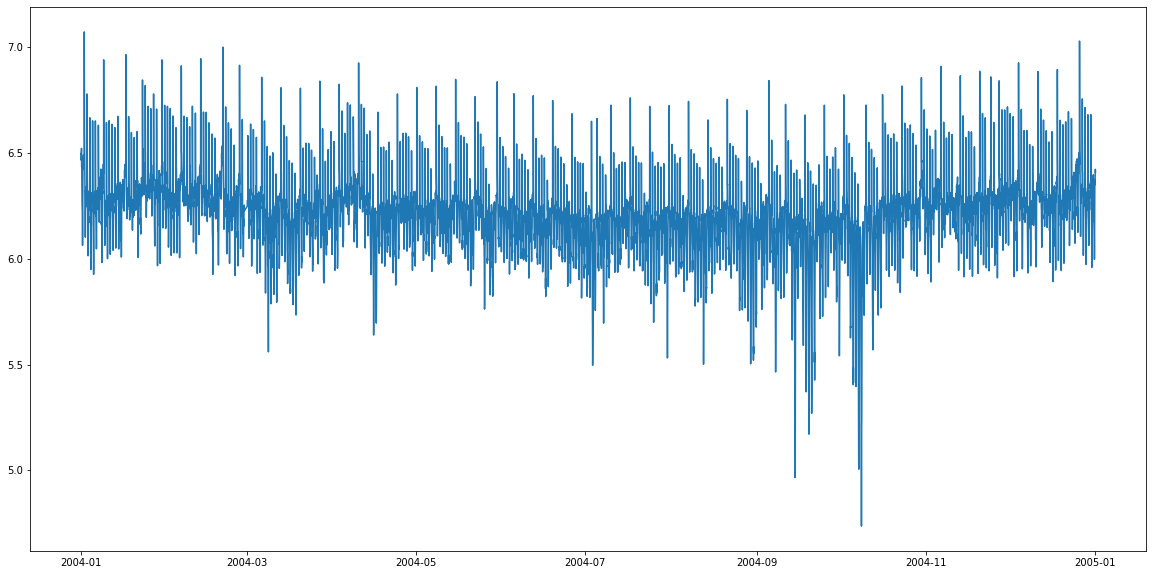

In [27]:
plt.figure(figsize=(20,10))
plt.plot(df_gas['ds'], df_gas['y'])

# Working on electric utility

In [28]:
future_electric = m_electric.make_future_dataframe(freq='H',periods=744) # Next 24x31 = 744 hours or 31 days
forecast_electric= m_electric.predict(future_electric)
forecast_electric[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
8754,2004-12-31 19:00:00,6.856159,6.750941,6.968800
8755,2004-12-31 20:00:00,6.788484,6.670601,6.897370
8756,2004-12-31 21:00:00,6.735785,6.628101,6.844455
8757,2004-12-31 22:00:00,6.706024,6.596240,6.813684
8758,2004-12-31 23:00:00,6.696783,6.587438,6.802386


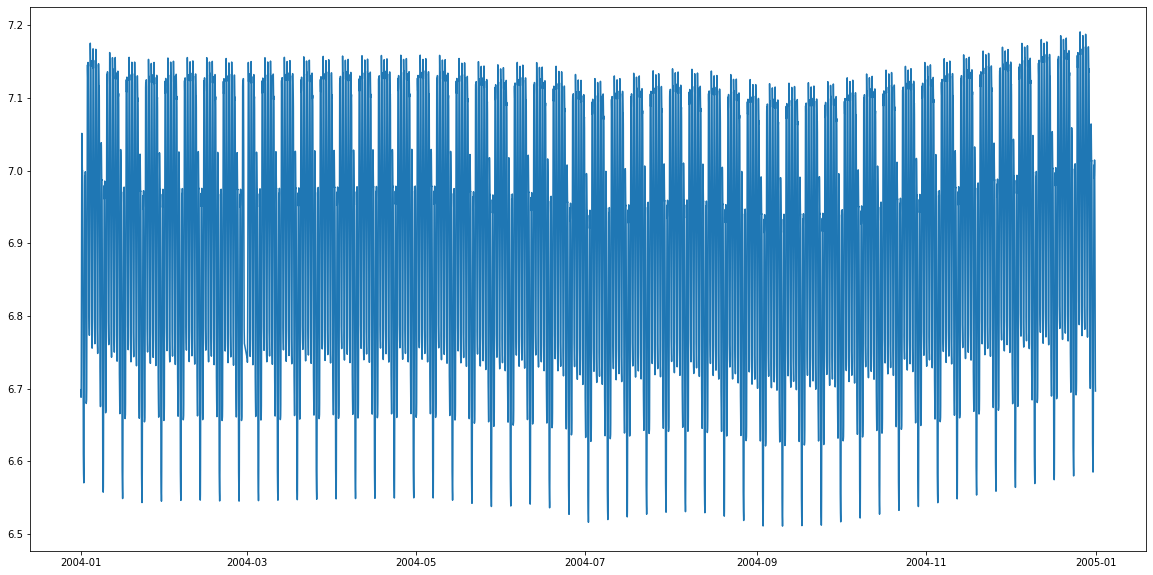

In [29]:
plt.figure(figsize=(20,10))
plt.plot(forecast_electric['ds'], forecast_electric['yhat'])

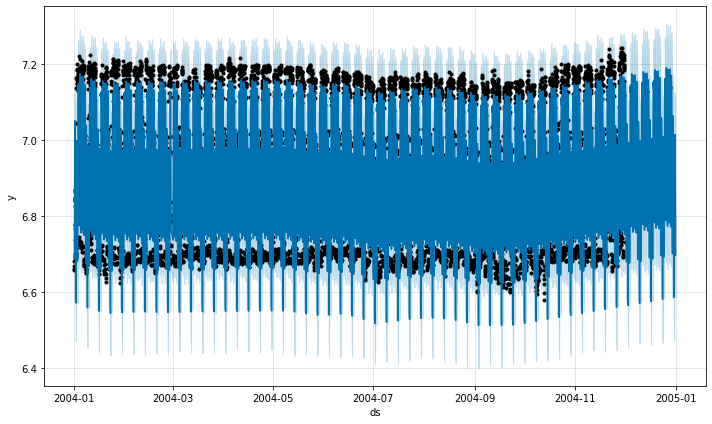

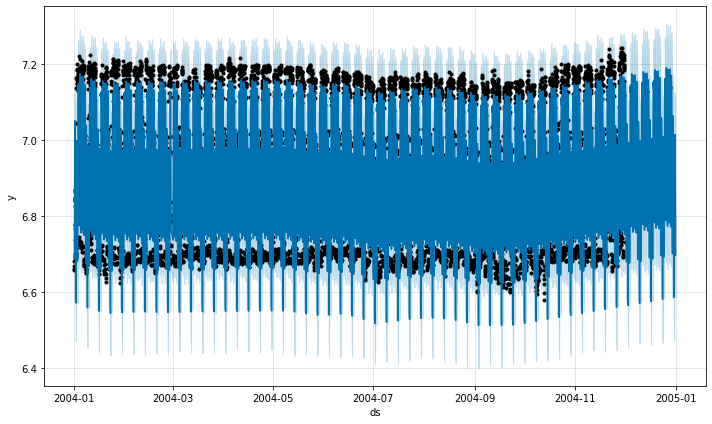

In [30]:
m_electric.plot(forecast_electric)

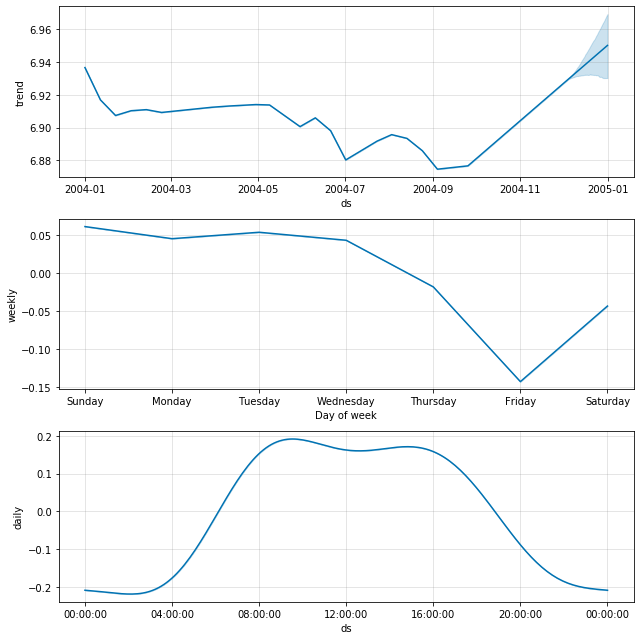

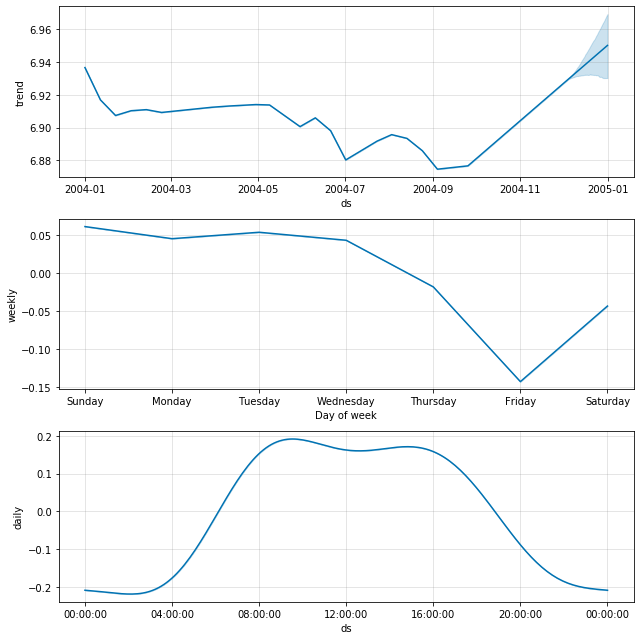

In [31]:
m_electric.plot_components(forecast_electric)

# Setting future for one year

In [32]:
future_electric_ch = m_electric.make_future_dataframe(freq='H', periods=744) # Next 5 days

# Now adjusting trends for the next month (31 days)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


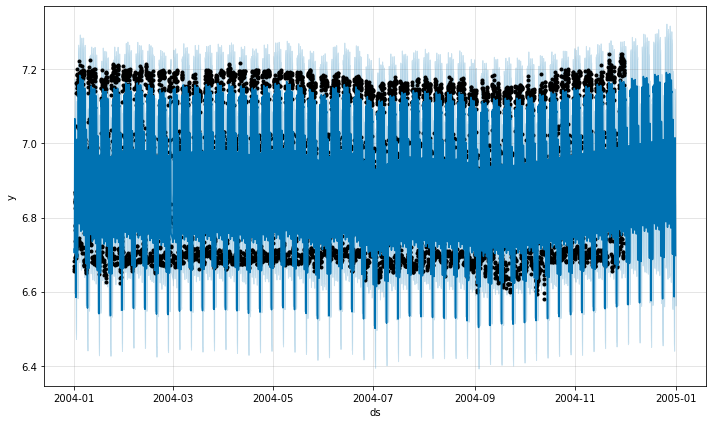

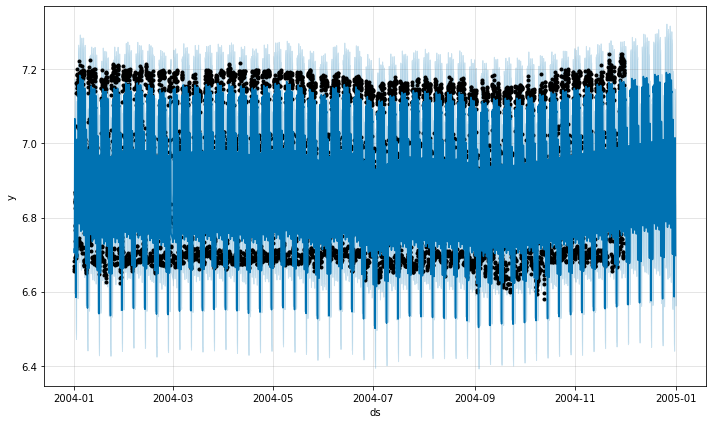

In [33]:
m_electric_ch = ph.Prophet(changepoint_prior_scale=0.5) # default is 0.5
forecast_electric_ch = m_electric_ch.fit(df11_electric).predict(future_electric_ch)
m_electric_ch.plot(forecast_electric_ch)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


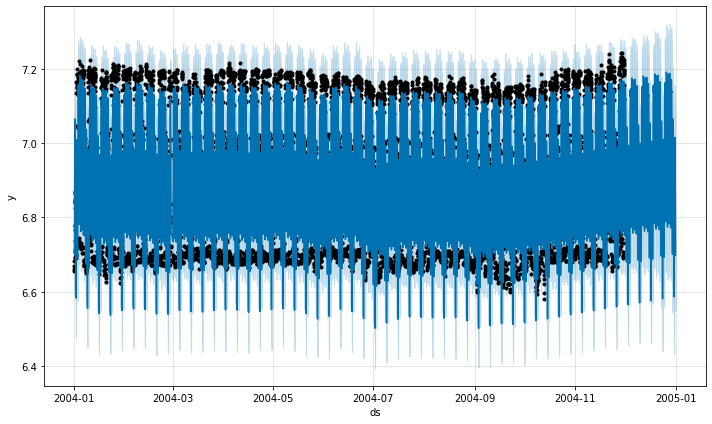

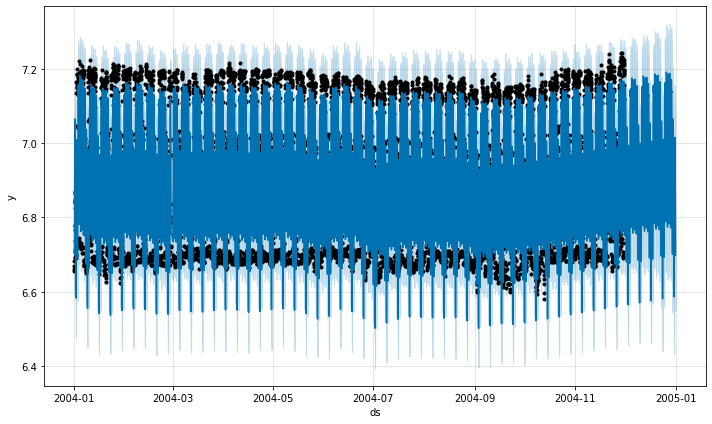

In [34]:
m_electric_ch1 = ph.Prophet(changepoint_prior_scale=1)
forecast_electric_ch1 = m_electric_ch1.fit(df11_electric).predict(future_electric_ch)
m_electric_ch1.plot(forecast_electric_ch1)

# Finding better scale for electric utilization

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


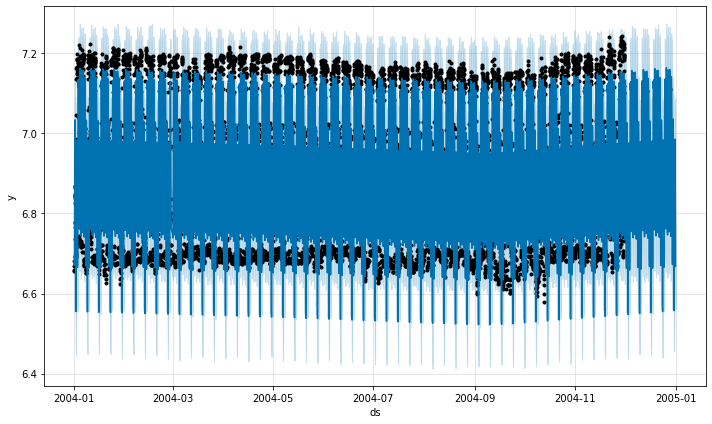

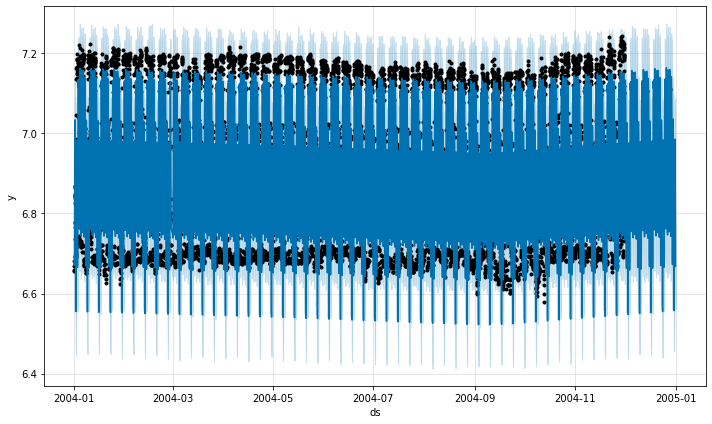

In [35]:
m_electric_ch001 = ph.Prophet(changepoint_prior_scale=0.001)
forecast_electric_ch001 = m_electric_ch001.fit(df11_electric).predict(future_electric_ch)
m_electric_ch001.plot(forecast_electric_ch001)

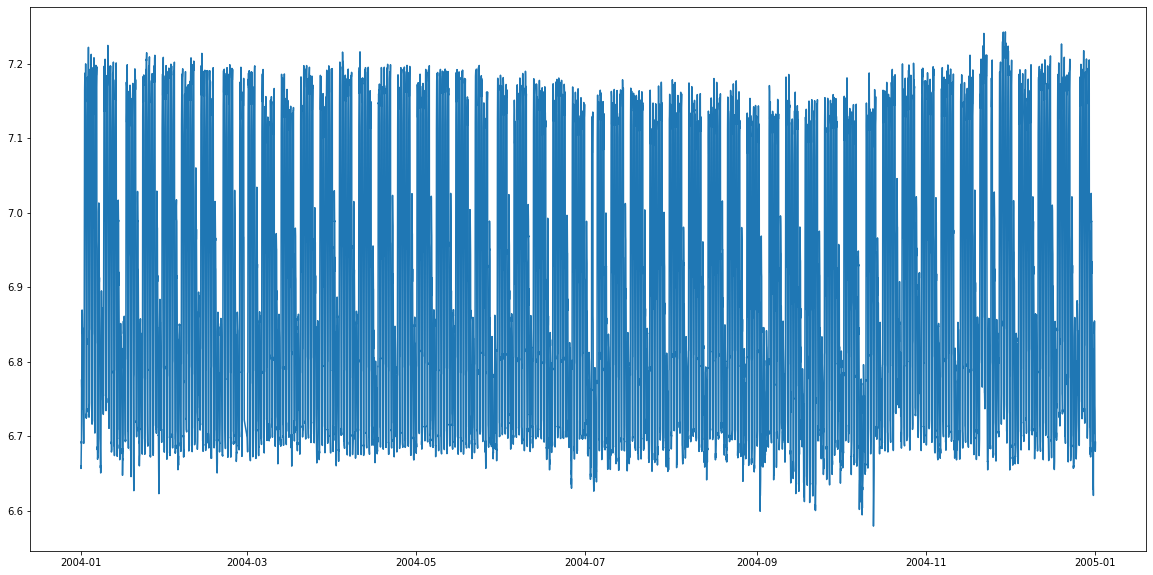

In [36]:
plt.figure(figsize=(20,10))
plt.plot(df_electric['ds'], df_electric['y'])